In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import os
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, TensorBoard, ModelCheckpoint
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import train_test_split
import cv2 as cv;
from google.colab.patches import cv2_imshow
from tensorflow.keras import layers, models
from google.colab import drive
from tensorflow.keras import regularizers
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Rescaling
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
glioma_tumor_path = "/content/drive/MyDrive/Data/Training/glioma_tumor"
meninigioma_tumor = "/content/drive/MyDrive/Data/Training/meningioma_tumor"
no_tumor_path = "/content/drive/MyDrive/Data/Training/no_tumor"
pituitary_tumor_path = "/content/drive/MyDrive/Data/Training/pituitary_tumor"
lioma_tumor_path_ts = "/content/drive/MyDrive/Data/Testing/glioma_tumor"
meninigioma_tumor_ts = "/content/drive/MyDrive/Data/Testing/meningioma_tumor"
no_tumor_path_ts = "/content/drive/MyDrive/Data/Testing/no_tumor"
pituitary_tumor_path_ts = "/content/drive/MyDrive/Data/Testing/pituitary_tumor"

In [3]:
train_folder = [
      glioma_tumor_path,
      meninigioma_tumor,
      no_tumor_path,
      pituitary_tumor_path,
      lioma_tumor_path_ts,
      meninigioma_tumor_ts,
      no_tumor_path_ts,
      pituitary_tumor_path_ts
]
y = [0,1,2,3,0,1,2,3]

X = []
Y = []

currIndex = 0;
for folder_path in train_folder:
  files = os.listdir(folder_path)

  for file in files:
      if file.endswith(('.jpg', '.jpeg', '.png', '.gif')):
          image_cv2 = cv.resize(cv.imread(os.path.join(folder_path, file),0),(150,150))
          X.append(image_cv2)
          Y.append(currIndex)
  currIndex += 1

In [4]:
X = np.array(X).astype(np.int64)
y = np.array(Y).astype(np.int64)

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=4)

In [25]:
model = models.Sequential()


model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 1)))  # Smaller filter size
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))

# model.add(layers.Dense(10, kernel_regularizer=regularizers.l2(0.01)))
model.add(layers.Dense(10, activation='relu', kernel_regularizer=regularizers.l2(0.01)))  # Combine softmax and regularization

In [26]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)  # Replace 0.001 with your chosen learning rate

model.compile(optimizer=optimizer,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [36]:
early_stopping = tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_test, y_test),callbacks=[early_stopping])

Epoch 1/30
92/92 [==============================] - 3s 31ms/step - loss: 0.3715 - accuracy: 0.9043 - val_loss: 0.2629 - val_accuracy: 0.9205
Epoch 2/30
92/92 [==============================] - 3s 28ms/step - loss: 0.3641 - accuracy: 0.8999 - val_loss: 0.2962 - val_accuracy: 0.9113
Epoch 3/30
92/92 [==============================] - 3s 31ms/step - loss: 0.3493 - accuracy: 0.9006 - val_loss: 0.2808 - val_accuracy: 0.9113
Epoch 4/30
92/92 [==============================] - 3s 30ms/step - loss: 0.3252 - accuracy: 0.9088 - val_loss: 0.3221 - val_accuracy: 0.8991
Epoch 5/30
92/92 [==============================] - 3s 28ms/step - loss: 0.3139 - accuracy: 0.9111 - val_loss: 0.2889 - val_accuracy: 0.8991
Epoch 6/30
92/92 [==============================] - 3s 28ms/step - loss: 0.2986 - accuracy: 0.9128 - val_loss: 0.2992 - val_accuracy: 0.8960


In [10]:
prd = model.predict(X_train)

92/92 [==============================] - 3s 17ms/step


In [37]:
model.evaluate(X_test,y_test)

11/11 [==============================] - 0s 10ms/step - loss: 0.2629 - accuracy: 0.9205


[0.26292070746421814, 0.9204893112182617]

In [38]:
print(prd)

[[0.         1.8987659  1.0650347  ... 0.         0.         0.        ]
 [6.698981   0.6777062  1.828032   ... 2.107038   0.         0.        ]
 [0.         5.101841   0.         ... 0.         0.         0.        ]
 ...
 [9.776704   1.5829979  0.7588809  ... 0.39178556 0.         0.        ]
 [0.         2.6696525  0.         ... 0.         0.         0.        ]
 [0.         1.190733   2.1004174  ... 0.         0.         0.        ]]


In [39]:
print(y_train)

[0 4 1 ... 3 0 1]


In [17]:
max(prd[0])

7.38346

In [40]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

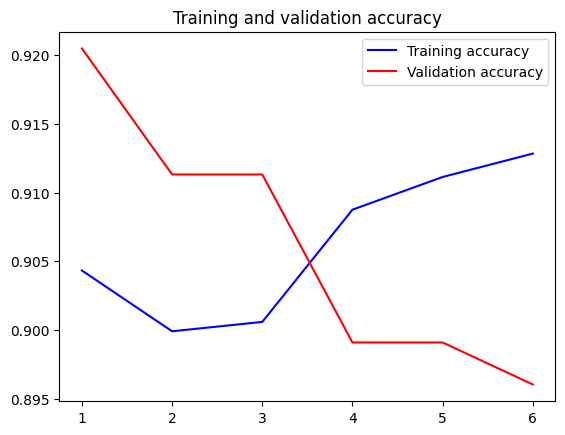

In [41]:
# prompt: plot the char of validation and train

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()


In [43]:
model.save('model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
